In [58]:
import pandas as pd
import matplotlib.pyplot as plt
from  sklearn.preprocessing import MinMaxScaler 
from scipy import stats
import numpy as np
from statsmodels.tsa.stattools import adfuller

In [59]:
TSLA_df = pd.read_csv("../data/TSLA_10years_data.csv")
SPY_df = pd.read_csv("../data/SPY_10years_data.csv")
BND_df = pd.read_csv("../data/BND_10years_data.csv")

* Basic statistics to understand the distribution of the data.

In [60]:
TSLA_df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,2515.000000,2515.000000,2515.000000,2515.000000,2.515000e+03,2515.0,2515.000000
mean,133.732657,136.729599,130.533528,133.697908,1.146432e+08,0.0,0.003181
std,121.301286,124.050445,118.267514,121.186898,7.332354e+07,0.0,0.116250
min,9.488000,10.331333,9.403333,9.578000,1.062000e+07,0.0,0.000000
25%,19.370667,19.806334,18.951667,19.401667,6.939015e+07,0.0,0.000000
50%,103.000000,108.428001,99.133331,103.067329,9.567210e+07,0.0,0.000000
75%,237.385002,243.044998,233.111664,237.989998,1.324342e+08,0.0,0.000000
max,475.899994,488.540009,457.510010,479.859985,9.140820e+08,0.0,5.000000


In [61]:
SPY_df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
count,2515.000000,2515.000000,2515.000000,2515.000000,2.515000e+03,2515.000000,2515.0,2515.0
mean,336.645419,338.516819,334.617484,336.713126,8.476471e+07,0.022739,0.0,0.0
std,126.789696,127.439044,126.056573,126.815737,4.433420e+07,0.181511,0.0,0.0
min,155.426545,156.926777,153.758485,155.869797,2.027000e+07,0.000000,0.0,0.0
25%,233.768448,236.083089,231.688427,234.190041,5.771670e+07,0.000000,0.0,0.0
50%,309.175535,310.705123,306.601219,308.779480,7.421450e+07,0.000000,0.0,0.0
75%,422.047793,424.310222,419.193885,421.886749,9.750170e+07,0.000000,0.0,0.0
max,639.460022,639.849976,635.539978,637.179993,5.072443e+08,1.966000,0.0,0.0


In [62]:
BND_df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
count,2515.000000,2515.000000,2515.000000,2515.000000,2.515000e+03,2515.000000,2515.0,2515.0
mean,68.563507,68.663456,68.456455,68.561181,4.470264e+06,0.008887,0.0,0.0
std,4.518363,4.525471,4.507657,4.517074,2.901400e+06,0.040685,0.0,0.0
min,61.174283,61.249758,61.144077,61.204468,0.000000e+00,0.000000,0.0,0.0
25%,64.730452,64.787891,64.642583,64.718342,2.228950e+06,0.000000,0.0,0.0
50%,67.708689,67.827483,67.565424,67.713684,4.166800e+06,0.000000,0.0,0.0
75%,71.921594,72.080329,71.811007,71.935459,5.921400e+06,0.000000,0.0,0.0
max,77.378749,77.413307,77.283688,77.318253,3.396300e+07,0.369000,0.0,0.0


* Check all columns have appropriate data types and check for missing values

In [63]:
TSLA_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2515 entries, 0 to 2514
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          2515 non-null   object 
 1   Open          2515 non-null   float64
 2   High          2515 non-null   float64
 3   Low           2515 non-null   float64
 4   Close         2515 non-null   float64
 5   Volume        2515 non-null   int64  
 6   Dividends     2515 non-null   float64
 7   Stock Splits  2515 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 157.3+ KB


In [64]:
SPY_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2515 entries, 0 to 2514
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           2515 non-null   object 
 1   Open           2515 non-null   float64
 2   High           2515 non-null   float64
 3   Low            2515 non-null   float64
 4   Close          2515 non-null   float64
 5   Volume         2515 non-null   int64  
 6   Dividends      2515 non-null   float64
 7   Stock Splits   2515 non-null   float64
 8   Capital Gains  2515 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 177.0+ KB


In [65]:
BND_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2515 entries, 0 to 2514
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           2515 non-null   object 
 1   Open           2515 non-null   float64
 2   High           2515 non-null   float64
 3   Low            2515 non-null   float64
 4   Close          2515 non-null   float64
 5   Volume         2515 non-null   int64  
 6   Dividends      2515 non-null   float64
 7   Stock Splits   2515 non-null   float64
 8   Capital Gains  2515 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 177.0+ KB


In [66]:
TSLA_df['Date'] = pd.to_datetime(TSLA_df['Date'])
SPY_df['Date'] = pd.to_datetime(SPY_df['Date'])
BND_df['Date'] = pd.to_datetime(BND_df['Date'])

C:\Users\HP\AppData\Local\Temp\ipykernel_16212\1627981917.py:1: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  TSLA_df['Date'] = pd.to_datetime(TSLA_df['Date'])
C:\Users\HP\AppData\Local\Temp\ipykernel_16212\1627981917.py:2: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  SPY_df['Date'] = pd.to_datetime(SPY_df['Date'])
C:\Users\HP\AppData\Local\Temp\ipykernel_16212\1627981917.py:3: FutureWarning: In a future version of pandas, parsing datetimes wi

In [67]:
print("Time interval for TSLA data:", TSLA_df['Date'].min(), "to", TSLA_df['Date'].max())
print("Time interval for SPY data:", SPY_df['Date'].min(), "to", SPY_df['Date'].max())
print("Time interval for BND data:", BND_df['Date'].min(), "to", BND_df['Date'].max())

Time interval for TSLA data: 2015-08-10 00:00:00-04:00 to 2025-08-08 00:00:00-04:00
Time interval for SPY data: 2015-08-10 00:00:00-04:00 to 2025-08-08 00:00:00-04:00
Time interval for BND data: 2015-08-10 00:00:00-04:00 to 2025-08-08 00:00:00-04:00


In [68]:
TSLA_df.isnull().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

In [69]:
SPY_df.isnull().sum()

Date             0
Open             0
High             0
Low              0
Close            0
Volume           0
Dividends        0
Stock Splits     0
Capital Gains    0
dtype: int64

In [70]:
BND_df.isnull().sum()

Date             0
Open             0
High             0
Low              0
Close            0
Volume           0
Dividends        0
Stock Splits     0
Capital Gains    0
dtype: int64

We do not have missing value

* Normalize the data 

In [71]:
scaler = MinMaxScaler()
TSLA_df['Close'] = scaler.fit_transform(TSLA_df[['Close']])

* Visualize the closing price over time to identify trends and patterns

In [72]:
TSLA_df["Close"].head()

0    0.013817
1    0.013283
2    0.013396
3    0.014011
4    0.014102
Name: Close, dtype: float64

In [73]:
TSLA_df.sort_values(by='Date', inplace=True)

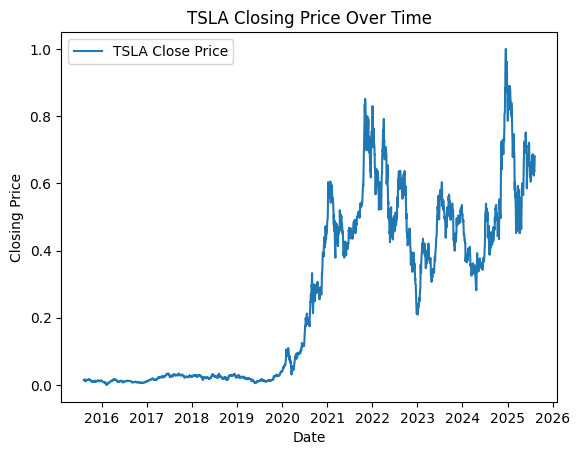

In [74]:
plt.plot(TSLA_df['Date'], TSLA_df['Close'], label='TSLA Close Price')
plt.title('TSLA Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

* Calculate daily percentage

In [75]:
TSLA_df["Daily_Change"] = TSLA_df['Close'].pct_change() * 100

In [76]:
TSLA_df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Daily_Change
0,2015-08-10 00:00:00-04:00,15.876667,16.198000,15.736667,0.013817,62788500,0.0,0.0,NaN
1,2015-08-11 00:00:00-04:00,15.810000,15.953333,15.629333,0.013283,63973500,0.0,0.0,-3.867855
2,2015-08-12 00:00:00-04:00,15.666667,15.984667,15.516000,0.013396,55920000,0.0,0.0,0.853788
3,2015-08-13 00:00:00-04:00,15.990667,16.431999,15.941333,0.014011,70338000,0.0,0.0,4.592593
4,2015-08-14 00:00:00-04:00,16.482668,16.528667,16.118000,0.014102,65472000,0.0,0.0,0.647493


* Plot the daily percentage change

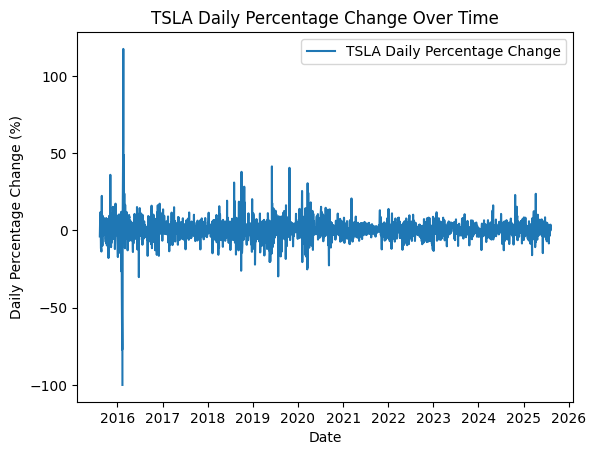

In [77]:
plt.plot(TSLA_df["Date"] , TSLA_df["Daily_Change"], label='TSLA Daily Percentage Change')
plt.title('TSLA Daily Percentage Change Over Time')
plt.xlabel('Date')
plt.ylabel('Daily Percentage Change (%)')
plt.legend()
plt.show()

* Analyze rolling means and standard deviations

Text(0, 0.5, 'Value')

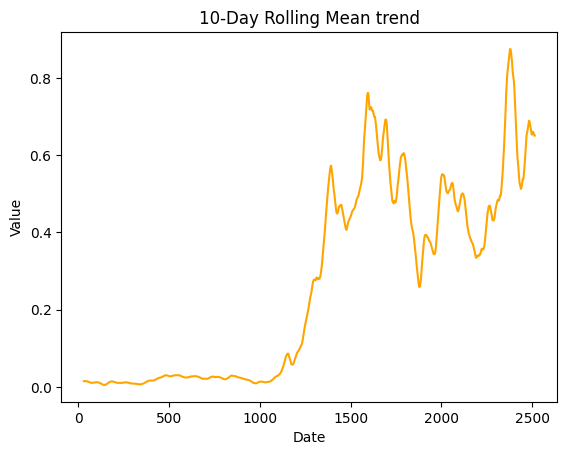

In [102]:
TSLA_df["Close"].rolling(window=30).mean().plot(label='10-Day Rolling Mean', color='orange')
plt.title('10-Day Rolling Mean trend')
plt.xlabel('Date')
plt.ylabel('Value')

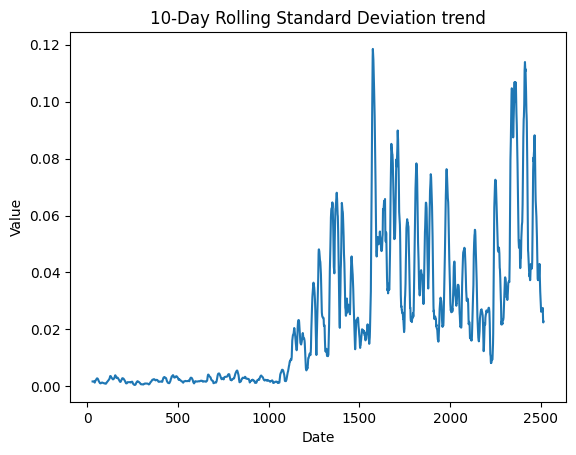

In [103]:
TSLA_df["Close"].rolling(window=30).std().plot(label='10-Day Rolling Std Dev')
plt.title('10-Day Rolling Standard Deviation trend')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

* Outlier detection 

In [85]:
TSLA_df.dropna(inplace=True)

In [88]:
TSLA_df["Daily_Change"].describe()

c:\Users\HP\OneDrive\Desktop\Tenx\Forecast_Financial_Data\venv\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


count    2514.000000
mean             inf
std              NaN
min      -100.000000
25%        -2.420708
50%         0.166592
75%         3.037374
max              inf
Name: Daily_Change, dtype: float64

In [89]:
# Replace inf/-inf with NaN and drop NaN values
TSLA_df["Daily_Change"].replace([np.inf, -np.inf], np.nan, inplace=True)
TSLA_df.dropna(subset=["Daily_Change"], inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_16212\3997975334.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  TSLA_df["Daily_Change"].replace([np.inf, -np.inf], np.nan, inplace=True)


In [90]:
TSLA_df["Daily_Change"].describe()

count    2513.000000
mean        0.318635
std         6.888032
min      -100.000000
25%        -2.421098
50%         0.165491
75%         3.026993
max       117.477973
Name: Daily_Change, dtype: float64

In [91]:
TSLA_df["Z_Score_of_daily_change"] = np.abs(stats.zscore(TSLA_df["Daily_Change"]))

In [92]:
TSLA_df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Daily_Change,Z_Score_of_daily_change
1,2015-08-11 00:00:00-04:00,15.810000,15.953333,15.629333,0.013283,63973500,0.0,0.0,-3.867855,0.607913
2,2015-08-12 00:00:00-04:00,15.666667,15.984667,15.516000,0.013396,55920000,0.0,0.0,0.853788,0.077709
3,2015-08-13 00:00:00-04:00,15.990667,16.431999,15.941333,0.014011,70338000,0.0,0.0,4.592593,0.620614
4,2015-08-14 00:00:00-04:00,16.482668,16.528667,16.118000,0.014102,65472000,0.0,0.0,0.647493,0.047753
5,2015-08-17 00:00:00-04:00,17.037333,17.106001,16.700666,0.015781,107650500,0.0,0.0,11.901892,1.681984


* Days with unusually high or low returns

In [94]:
TSLA_df[TSLA_df["Z_Score_of_daily_change"]  > 3]

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Daily_Change,Z_Score_of_daily_change
13,2015-08-27 00:00:00-04:00,15.400000,16.316668,15.387333,0.014079,114840000,0.0,0.0,22.360480,3.200657
61,2015-11-04 00:00:00-05:00,15.133333,15.516000,15.013333,0.012469,190896000,0.0,0.0,35.992578,5.180150
121,2016-02-02 00:00:00-05:00,12.828000,12.874667,12.015333,0.005544,86604000,0.0,0.0,-26.581552,3.906129
122,2016-02-03 00:00:00-05:00,12.239333,12.262667,11.345333,0.004226,118971000,0.0,0.0,-23.779082,3.499187
124,2016-02-05 00:00:00-05:00,11.420000,11.533333,10.516000,0.002683,141564000,0.0,0.0,-40.208477,5.884870
125,2016-02-08 00:00:00-05:00,10.473333,10.476667,9.733333,0.000612,139695000,0.0,0.0,-77.179074,11.253305
127,2016-02-10 00:00:00-05:00,10.033333,10.331333,9.449333,0.000000,156097500,0.0,0.0,-100.000000,14.567092
130,2016-02-16 00:00:00-05:00,10.580000,10.863333,10.274000,0.001630,83907000,0.0,0.0,56.038238,8.090945
131,2016-02-17 00:00:00-05:00,10.600000,11.289333,10.445333,0.003545,87378000,0.0,0.0,117.477973,17.012501
134,2016-02-22 00:00:00-05:00,11.341333,11.927333,11.323333,0.004830,75901500,0.0,0.0,48.712321,7.027162


* Augmented Dickey-Fuller test on the closing prices and daily returns

In [96]:
result = adfuller(TSLA_df["Daily_Change"], autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -14.919880884882938
n_lags: 1.4168234933853204e-27
p-value: 1.4168234933853204e-27
Critial Values:
   1%, -3.4329673628206447
Critial Values:
   5%, -2.862696337194766
Critial Values:
   10%, -2.567385563035082


In [97]:
result = adfuller(TSLA_df["Close"], autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')    

ADF Statistic: -1.3553897443168665
n_lags: 0.6034663087990926
p-value: 0.6034663087990926
Critial Values:
   1%, -3.4329842325121738
Critial Values:
   5%, -2.862703786843828
Critial Values:
   10%, -2.567389529328891


* Calculate rolling means and standard deviations of DR

In [104]:
TSLA_df["Closing_Price_Rolling_Mean"] = TSLA_df["Daily_Change"].rolling(window=30).mean().isnull().sum()
TSLA_df["Closing_Price_Rolling_STD"] = TSLA_df["Daily_Change"].rolling(window=30).std().isnull().sum()